# Optional Task: Dimensionality reduction using Principal Component Analysis (PCA)

## 1

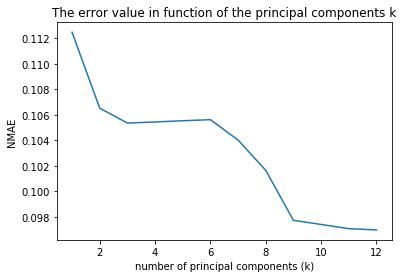

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time

def get_nmae(y_predict, y_test):
    m = len(y_test.index)
    y_mean = y_test['DispFrames'].mean()
    sum_abs_y_mean_predict = 0.0
    i = 0
    for _, row in y_test.iterrows():
        sum_abs_y_mean_predict += abs(row['DispFrames'] - y_predict[i][0])
        i += 1
    
    nmae = (sum_abs_y_mean_predict / m) / y_mean
    return np.round(nmae, decimals=8)

# X = pd.read_csv('data/X.csv')
# Y = pd.read_csv('data/Y.csv')
# Y['TimeStamp'] = Y.TimeStamp.astype(int)
# X.index = pd.to_datetime(
#     X['TimeStamp'], unit='s')
# Y.index = pd.to_datetime(
#     Y['TimeStamp'], unit='s')

# x_train_ori, x_test_ori, y_train_ori, y_test_ori = train_test_split(
#     X.drop(['TimeStamp'], axis=1), Y[["DispFrames"]], train_size=0.7)

# use the same x and y value from task 4 because we are going to compare them
x_train_ori = pd.read_csv('x_train.csv')
x_train_ori.index = pd.to_datetime(x_train_ori['TimeStamp'])
x_train_ori = x_train_ori.drop(['TimeStamp'], axis=1)

x_test_ori = pd.read_csv('x_test.csv')
x_test_ori.index = pd.to_datetime(x_test_ori['TimeStamp'])
x_test_ori = x_test_ori.drop(['TimeStamp'], axis=1)


y_test_ori = pd.read_csv('y_test.csv')
y_test_ori.index = pd.to_datetime(y_test_ori['TimeStamp'])
y_test_ori = y_test_ori.drop(['TimeStamp'], axis=1)

y_train_ori = pd.read_csv('y_train.csv')
y_train_ori.index = pd.to_datetime(y_train_ori['TimeStamp'])
y_train_ori = y_train_ori.drop(['TimeStamp'], axis=1)

all_k = list(range(1, 13))
sc = StandardScaler()
x_train_normalized = sc.fit_transform(x_train_ori)
x_test_normalized = sc.transform(x_test_ori)
    
pca_nmaes = []
training_time = []
for k in all_k:    
    pca = PCA(n_components = k)
    x_train = pca.fit_transform(x_train_normalized)
    x_test = pca.transform(x_test_normalized)

    regression_model = LinearRegression()
    t0 = int(round(time.time() * 1000))
    regression_model.fit(x_train, y_train_ori)
    t1 = int(round(time.time() * 1000))
    training_time.append(t1 - t0)
    y_predict = regression_model.predict(x_test)
    
    nmae = get_nmae(y_predict, y_test_ori)
    pca_nmaes.append(nmae)

plt.plot(all_k, pca_nmaes)
plt.xlabel("number of principal components (k)")
plt.ylabel("NMAE")
plt.title("The error value in function of the principal components k")
plt.show()


## 2

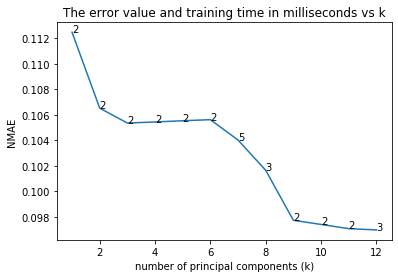

In [89]:
plt.plot(all_k, pca_nmaes)
plt.xlabel("number of principal components (k)")
plt.ylabel("NMAE")
plt.title("The error value and training time in milliseconds vs k")

for i, txt in enumerate(training_time):
    plt.annotate(txt, (all_k[i], pca_nmaes[i]))

plt.show()
    
# fig, ax1 = plt.subplots()
# color = 'tab:red'
# ax1.set_xlabel('k')
# ax1.set_ylabel('nmae', color=color)
# ax1.plot(all_k, pca_nmaes, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()

# color = 'tab:blue'
# ax2.set_ylabel('time (ms)', color=color)
# ax2.plot(all_k, training_time, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.title("error and training time tradeoff")
# plt.show()

## 3

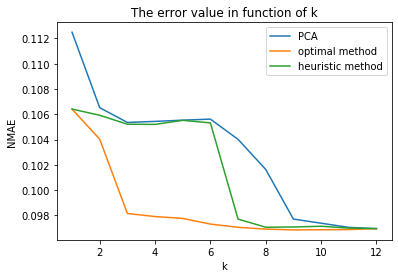

In [90]:
# to avoid re-computation, I copied the nmae values from task 4
optimal_nmae = [0.10641443, 0.10403296, 0.09815904, 0.09791591, 0.09776953, 0.09732086, 0.0970656, 0.09692486, 0.09685993, 0.09687329, 0.09688764, 0.09696111]
optimal_training_time = [2, 2, 2, 2, 3, 2, 8, 2, 2, 2, 3, 3]

heuristic_nmae = [0.10641443, 0.10592443, 0.10521689, 0.10520312, 0.10552432, 0.10532269, 0.09771442, 0.09707446, 0.09709065, 0.09714997, 0.09700545, 0.09696111]
heuristic_time = [3, 2, 2, 3, 8, 9, 3, 3, 3, 4, 11, 3]

plt.plot(all_k, pca_nmaes, label="PCA")
plt.plot(all_k, optimal_nmae, label="optimal method")
plt.plot(all_k, heuristic_nmae, label="heuristic method")
plt.xlabel("k")
plt.ylabel("NMAE")
plt.title("The error value in function of k")
plt.legend()
plt.show()

## 4

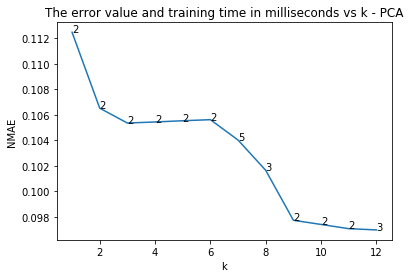

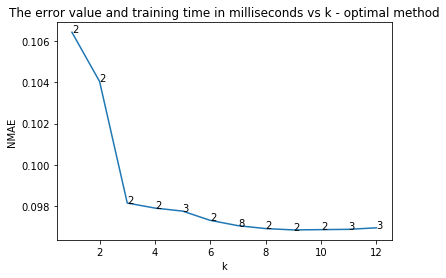

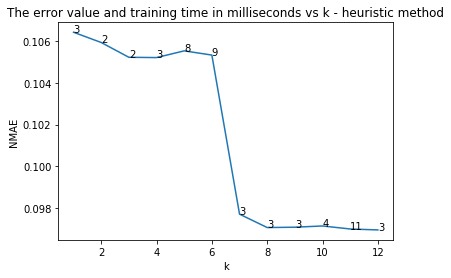

In [91]:
plt.xlabel("k")
plt.ylabel("NMAE")
plt.title("The error value and training time in milliseconds vs k - PCA")
plt.plot(all_k, pca_nmaes, label="PCA")
for i, txt in enumerate(training_time):
    plt.annotate(txt, (all_k[i], pca_nmaes[i]))
plt.show()

plt.xlabel("k")
plt.ylabel("NMAE")
plt.title("The error value and training time in milliseconds vs k - optimal method")
plt.plot(all_k, optimal_nmae, label="optimal method")
for i, txt in enumerate(optimal_training_time):
    plt.annotate(txt, (all_k[i], optimal_nmae[i]))
plt.show()

plt.xlabel("k")
plt.ylabel("NMAE")
plt.title("The error value and training time in milliseconds vs k - heuristic method")
plt.plot(all_k, heuristic_nmae, label="heuristic method")
for i, txt in enumerate(heuristic_time):
    plt.annotate(txt, (all_k[i], heuristic_nmae[i]))
plt.show()